In [1]:
import cv2
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa

from tqdm import tqdm_notebook
import pandas as pd
from matplotlib import pyplot as plt

from torch.utils.data import DataLoader, Dataset

from importlib import reload
import dataset
reload(dataset)
from dataset import TgsDataSet
import augmentation
reload(augmentation)
from augmentation import *

from augmentation_huang import *

from imgaug import augmenters as iaa
from imgaug import parameters as iap

import time
import os

from torchvision import transforms

%matplotlib inline

In [2]:
import pickle
SEED = 1234
with open('../data/processed/dataset_%d.pkl'%SEED, 'rb') as f:
    ids_train, ids_valid, x_train, x_valid, y_train, y_valid, cov_train, cov_test, depth_train, depth_test = pickle.load(f)
y_train = y_train.astype(np.uint8)

k = 20
x_train, y_train = x_train[:k], y_train[:k]
x_valid, y_valid = x_valid[:2], y_valid[:2]


train_ds = TgsDataSet(x_train, y_train, transform=True)

train_dl = DataLoader(
        train_ds,
        batch_size=1,
        shuffle=False,#True
        #sampler=StratifiedSampler(),
        num_workers=20,
    )

In [3]:
cnt = 0
for i, (input_data, truth) in enumerate(train_dl):
    is_zero_cov = (truth.sum(dim=2, keepdim=False).sum(dim=2, keepdim=False)==0).reshape(-1)
#     if i==0:
#         break
    if is_zero_cov==1:
        cnt += 1

cnt, (y_train.reshape(-1, 128*128).sum(axis=1)==0).sum()

# for i, (input_data, truth) in enumerate(train_dl):
#     if i==4:
#         break

# truth[0,0].sum()

(1817, 1406)

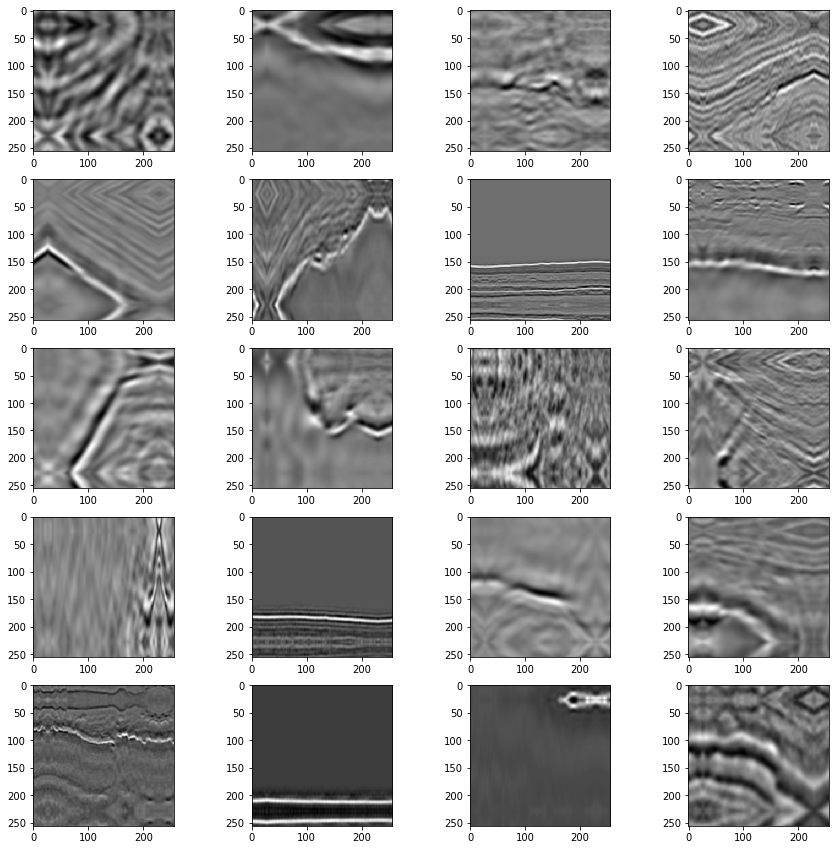

In [4]:
seed = get_seed()
#seed = 1234
#print('seed: ', seed)
#ia.imgaug.seed(1234)
np.random.seed(seed)

fig=plt.figure(figsize=(15, 15))
for i, (input_data, truth) in enumerate(train_dl):
    if i<20:
        ax = fig.add_subplot(5, 4, i+1)
        #ax.title.set_text('augment mask')
        #plt.imshow(truth[0, 0], cmap='gray')
        plt.imshow(input_data[0, 0], cmap='gray')

TypeError: do_center_pad_to_factor256() missing 1 required positional argument: 'mask'

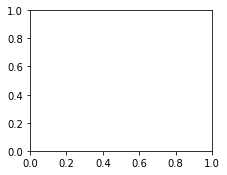

In [3]:
fig=plt.figure(figsize=(15, 15))
for i, input_data in enumerate(train_ds.x_train):
    if i<20:
        ax = fig.add_subplot(5, 4, i+1)
        #ax.title.set_text('augment mask')
        #plt.imshow(truth[0, 0], cmap='gray')
        plt.imshow(do_center_pad_to_factor256(input_data.reshape(101, 101)), cmap='gray')#binary

In [71]:
idx = 4

for i, (input_data, truth) in enumerate(train_dl):
    img = truth[0].numpy()
    if i==idx:
        break
img.shape

(1, 256, 256)

In [72]:
img256 = img.reshape(256, 256)
img202 = img256[27:27+202, 27:27+202]
img101 = cv2.resize(img202.astype(np.float64), dsize=(101, 101))

In [73]:
pd.unique(img101.reshape(-1,))

array([0., 1.])

In [67]:
img101

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])